In [0]:
import os
import json
import gzip
import pandas as pd
import numpy as np
from urllib.request import urlopen

In [0]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz

--2020-04-25 04:00:15--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169071325 (161M) [application/octet-stream]
Saving to: ‘Cell_Phones_and_Accessories_5.json.gz’

Cell_Phones_and_Acc 100%[===================>] 161.24M  10.9MB/s    in 16s     

2020-04-25 04:00:31 (10.4 MB/s) - ‘Cell_Phones_and_Accessories_5.json.gz’ saved [169071325/169071325]



In [0]:
data = []
with gzip.open('Cell_Phones_and_Accessories_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)

In [0]:
df['vote'].fillna('0', inplace=True)
df3 = df.fillna('')
df3['reviewTime'] = pd.to_datetime(df3['reviewTime'], format ='%m %d, %Y')
df3.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,2014-08-04,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,0,
1,5.0,True,2014-02-12,A269FLZCB4GIPV,7508492919,,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,0,
2,3.0,True,2014-02-08,AB6CHQWHZW4TV,7508492919,,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,0,
3,2.0,True,2014-02-04,A1M117A53LEI8,7508492919,,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,0,
4,4.0,True,2014-02-03,A272DUT8M88ZS8,7508492919,,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,0,


In [0]:
df1 = df3.loc[:,['reviewTime','asin','reviewerID','vote']]
df1.dtypes

reviewTime    datetime64[ns]
asin                  object
reviewerID            object
vote                  object
dtype: object

In [0]:
df2 = df3.loc[:,['reviewText']]
df2["nb_words"] = df2["reviewText"].apply(lambda x: len(x.split(" ")))
df2.head()

,reviewText,nb_words
0,Looks even better in person. Be careful to not...,49
1,When you don't want to spend a whole lot of ca...,22
2,"so the case came on time, i love the design. I...",51
3,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,22
4,"I liked it because it was cute, but the studs ...",31


In [0]:
df1['vote'] = df1['vote'].astype(str)
df1['vote'] = df1['vote'].str.replace(",","")
df1['vote'] = df1['vote'].astype(int)

In [0]:
influencers = df1.sort_values('vote', ascending=False).drop_duplicates(['asin','reviewerID'],keep='last') #range order it by the vote, find the max.
#influencers = influencers[(influencers['vote'] > 100)]
influencers['reviewTime'] = pd.DatetimeIndex(influencers['reviewTime'], dtype='datetime64[ns]', freq=None)
influencers = influencers.set_index('reviewTime')
influencers['Year'] = influencers.index.year
influencers['Time'] = influencers.index
influencers['enddates'] = pd.to_datetime("'2018-10-02'".replace("'",""))
influencers.head(500)

,asin,reviewerID,vote,Year,Time,enddates
reviewTime,,,,,,
2015-08-21,B00X5RV14Y,AQJ824C2JST96,2038,2015,2015-08-21,2018-10-02
2016-07-14,B01F9N5QXI,A22QN0P5ERNOKR,1737,2016,2016-07-14,2018-10-02
2016-02-05,B019O8YWXE,A1BDNTBJ0JWXSL,1410,2016,2016-02-05,2018-10-02
2015-04-30,B00UVSNVHA,A284QS51P9P9V1,1355,2015,2015-04-30,2018-10-02
2015-12-28,B0176HQ1O8,AT63Q5FKZEJ4I,1239,2015,2015-12-28,2018-10-02
...,...,...,...,...,...,...
2013-10-17,B00EF1OGOG,A2DKQQIZ793AV5,167,2013,2013-10-17,2018-10-02
2016-03-07,B01CJSF8IO,A2NWYAY4JJACDU,167,2016,2016-03-07,2018-10-02
2016-02-09,B017IAK70C,A1LWQSXHJPPPUX,166,2016,2016-02-09,2018-10-02


In [0]:
influencers.loc[influencers['asin'] == 'B004877KOK']

,asin,reviewerID,vote,Year,Time,enddates
reviewTime,,,,,,
2011-03-17,B004877KOK,A13MKSASQ6YWL7,562,2011,2011-03-17,2018-10-02
2011-02-20,B004877KOK,AGVWTYW0ULXHT,402,2011,2011-02-20,2018-10-02
2011-01-30,B004877KOK,A3JUHP1E3WUHEA,39,2011,2011-01-30,2018-10-02
2011-02-16,B004877KOK,A20VG5W98SX99L,32,2011,2011-02-16,2018-10-02
2011-11-12,B004877KOK,A14MOU9MF0NNVB,16,2011,2011-11-12,2018-10-02
...,...,...,...,...,...,...
2013-08-20,B004877KOK,AOYLVXJ38ELZ1,0,2013,2013-08-20,2018-10-02
2013-07-27,B004877KOK,A31N0XY2UTB25C,0,2013,2013-07-27,2018-10-02
2013-07-15,B004877KOK,A6Q0RYDVNC08V,0,2013,2013-07-15,2018-10-02


In [0]:
influencers['duration'] = influencers['enddates'] - influencers['Time']
influencers['duration'] = influencers['duration'] / np.timedelta64(1, 'D')
influencers.dtypes

asin                  object
reviewerID            object
vote                   int64
Year                   int64
Time          datetime64[ns]
enddates      datetime64[ns]
duration             float64
dtype: object

In [0]:
influencers.head()

,asin,reviewerID,vote,Year,Time,enddates,duration
reviewTime,,,,,,,
2015-08-21,B00X5RV14Y,AQJ824C2JST96,2038,2015,2015-08-21,2018-10-02,1138.0
2016-07-14,B01F9N5QXI,A22QN0P5ERNOKR,1737,2016,2016-07-14,2018-10-02,810.0
2016-02-05,B019O8YWXE,A1BDNTBJ0JWXSL,1410,2016,2016-02-05,2018-10-02,970.0
2015-04-30,B00UVSNVHA,A284QS51P9P9V1,1355,2015,2015-04-30,2018-10-02,1251.0
2015-12-28,B0176HQ1O8,AT63Q5FKZEJ4I,1239,2015,2015-12-28,2018-10-02,1009.0


In [0]:
influencers['duration_year'] = influencers['duration'] / 365
influencers['average'] = influencers['vote'] / influencers['duration_year']
influencers.sort_values('average', ascending = False).head(1000)

,asin,reviewerID,vote,Year,Time,enddates,duration,duration_year,average
reviewTime,,,,,,,,,
2016-07-14,B01F9N5QXI,A22QN0P5ERNOKR,1737,2016,2016-07-14,2018-10-02,810.0,2.219178,782.722222
2015-08-21,B00X5RV14Y,AQJ824C2JST96,2038,2015,2015-08-21,2018-10-02,1138.0,3.117808,653.664323
2016-02-05,B019O8YWXE,A1BDNTBJ0JWXSL,1410,2016,2016-02-05,2018-10-02,970.0,2.657534,530.567010
2016-04-28,B0196GQAKM,A3CLNI0ID1OON8,1147,2016,2016-04-28,2018-10-02,887.0,2.430137,471.989853
2016-09-25,B01DRV2BBY,A2NB2E5DXE319Z,927,2016,2016-09-25,2018-10-02,737.0,2.019178,459.097693
...,...,...,...,...,...,...,...,...,...
2016-09-03,B013KCS4CA,A3KBPJCH9WLD42,62,2016,2016-09-03,2018-10-02,759.0,2.079452,29.815547
2017-02-21,B01G1XUCA2,AWYO0XPLYPA25,48,2017,2017-02-21,2018-10-02,588.0,1.610959,29.795918
2016-02-19,B00Q9EDPI0,AJBHBY6FHBP5N,78,2016,2016-02-19,2018-10-02,956.0,2.619178,29.780335


In [0]:
2 = df1.sort_values('vote').groupby(['asin', 'reviewerID']).tail(1).sort_values('vote',ascending=False)

,asin,reviewerID,vote
733414,B00X5RV14Y,AQJ824C2JST96,2038
998698,B01F9N5QXI,A22QN0P5ERNOKR,1737
909912,B019O8YWXE,A1BDNTBJ0JWXSL,1410
694008,B00UVSNVHA,A284QS51P9P9V1,1355
788069,B010VFFU1W,A25GROL6KJV3QG,1290
...,...,...,...
1069503,B00GK9GSVU,A2KT2JPOF1LZT7,0
1069504,B00GKA11A2,A1FPEYHRYPXRE1,0
1069505,B00GKA11A2,A28Q77HWX1NIXS,0
1069506,B00GKAJCU8,A13JX3QESUGJ5L,0


No handles with labels found to put in legend.


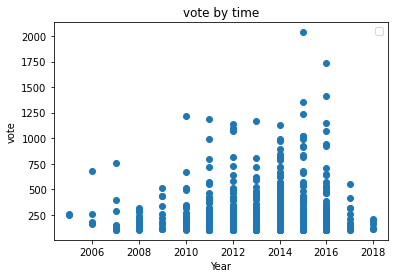

In [0]:
import matplotlib.pyplot as plt
x = influencers['Year']
y = influencers['vote']
plt.scatter(x, y)
plt.title("vote by time")
plt.xlabel("Year")
plt.ylabel("vote")
plt.legend()
plt.show()

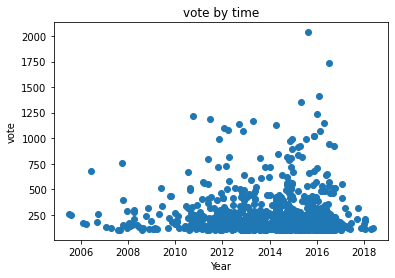

In [0]:
import matplotlib.pyplot as plt
x = influencers['Time']
y = influencers['vote']
plt.scatter(x,y)
plt.title("vote by time")
plt.xlabel("Year")
plt.ylabel("vote")
plt.show()

In [0]:
df3.groupby('vote').overall.value_counts().sort_values(ascending=False)

vote  overall
0     5.0        656383
      4.0        168956
      3.0         90042
      1.0         69447
      2.0         51575
                  ...  
297   5.0             1
298   2.0             1
992   5.0             1
301   4.0             1
995   3.0             1
Name: overall, Length: 1013, dtype: int64

Text(0, 0.5, 'Frequency')

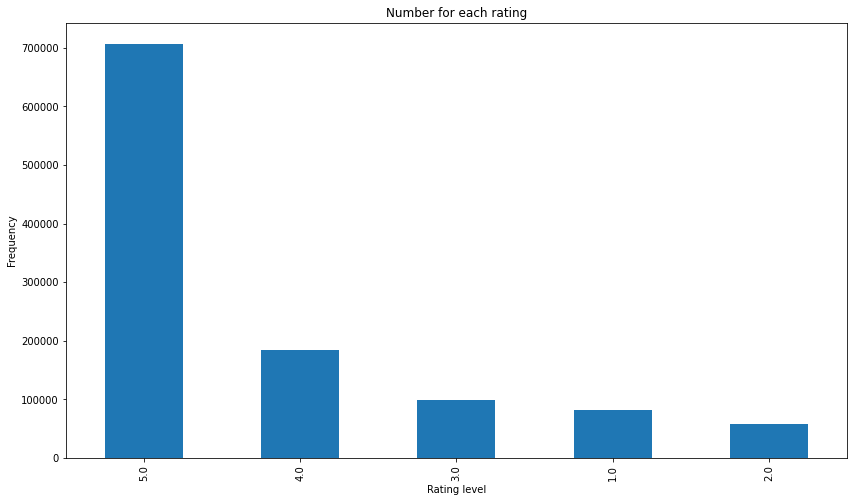

In [0]:
ax = df3['overall'].value_counts().plot(kind='bar', figsize=(14,8),title="Number for each rating")
ax.set_xlabel("Rating level")
ax.set_ylabel("Frequency")

In [0]:
df3.groupby('reviewTime').overall.value_counts().sort_values(ascending=False)

reviewTime  overall
2015-02-18  5.0        915
2016-01-20  5.0        887
2014-12-29  5.0        869
2015-02-11  5.0        860
2015-02-23  5.0        853
                      ... 
2009-10-14  1.0          1
2009-10-13  5.0          1
            3.0          1
2009-10-11  5.0          1
2002-10-23  4.0          1
Name: overall, Length: 18008, dtype: int64

In [0]:
df3.groupby('reviewTime')['reviewTime'].value_counts().sort_values(ascending=False)

reviewTime  reviewTime
2015-02-18  2015-02-18    1399
2016-01-20  2016-01-20    1342
2014-12-29  2014-12-29    1328
2016-04-19  2016-04-19    1319
2015-02-23  2015-02-23    1315
                          ... 
2008-04-25  2008-04-25       1
2006-10-31  2006-10-31       1
2006-11-01  2006-11-01       1
2006-11-02  2006-11-02       1
2002-10-23  2002-10-23       1
Name: reviewTime, Length: 4536, dtype: int64

In [0]:
df3.groupby('reviewTime').reviewTime.value_counts().max()


1399

In [0]:
df3.groupby('vote').reviewTime.value_counts()

vote  reviewTime
0     2015-02-18    1345
      2014-12-29    1246
      2016-01-20    1242
      2015-02-23    1238
      2016-04-19    1208
                    ... 
99    2016-03-24       1
      2016-08-28       1
      2016-10-27       1
992   2014-12-16       1
995   2015-07-15       1
Name: reviewTime, Length: 34348, dtype: int64

In [0]:
import matplotlib.pyplot as plt
x = df3['reviewTime']
y = df3['vote']
plt.plot(x, y)
plt.show()

Text(0, 0.5, 'Frequency')

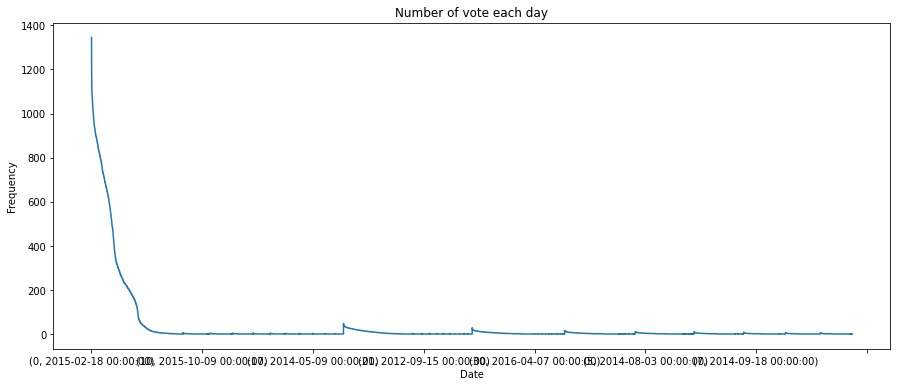

In [0]:
x = df3.groupby('vote').reviewTime.value_counts().plot(kind='line',figsize=(15,6),title="Number of vote each day")
x.set_xlabel("Date")
x.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

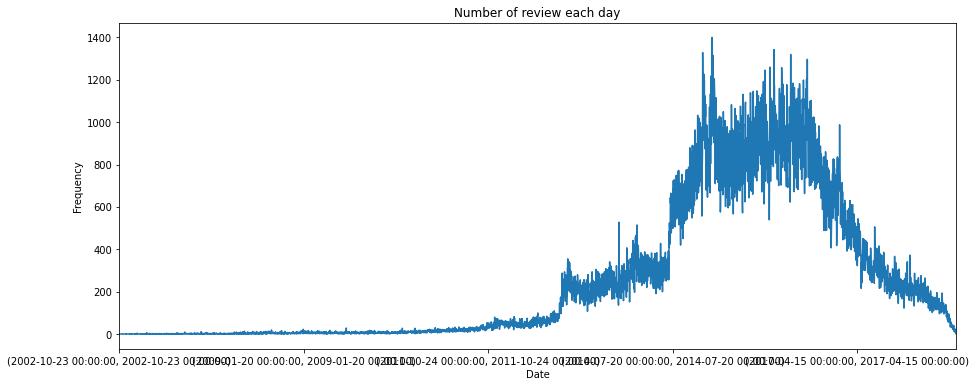

In [0]:
x = df3.groupby('reviewTime').reviewTime.value_counts().plot(kind='line',figsize=(15,6),title="Number of review each day")
x.set_xlabel("Date")
x.set_ylabel("Frequency")

In [0]:
df3.groupby('reviewerID').overall.value_counts().sort_values(ascending=False)

reviewerID      overall
A3HFQE02MDPC6I  5.0        306
A2LTYEYGKBYXRR  5.0        200
A3MFRAR121IHTN  5.0        144
A3RDSN4SZKF3O   5.0        130
A1FL151ER57VW3  5.0        114
                          ... 
A3KWCPP5TSVIOH  3.0          1
                4.0          1
A3KWIW4P2OR68I  4.0          1
A26VFOPF302DGN  4.0          1
AZZYW4YOE1B6E   1.0          1
Name: overall, Length: 393954, dtype: int64

In [0]:
df3.groupby('reviewerName').overall.value_counts().sort_values(ascending=False)

reviewerName     overall
Amazon Customer  5.0        24546
                 4.0         5795
                 3.0         3080
                 1.0         2809
Kindle Customer  5.0         2113
                            ...  
Justlkn          2.0            1
                 1.0            1
Justjon          4.0            1
                 2.0            1
santi            3.0            1
Name: overall, Length: 312979, dtype: int64

In [0]:
df3.groupby('reviewerID').overall.mean()

reviewerID
A0009478CBXKUCALUC7U    4.333333
A0024936S1WI02OHH9DP    5.000000
A0034986DWR7WEDQN0GV    4.818182
A0052224HSIECFUBVN5W    5.000000
A007917716EGEEP4D8LB    4.181818
                          ...   
AZZX8PSNPPUWD           4.750000
AZZXJAE2DILET           3.800000
AZZY4E6QPTBVP           4.400000
AZZY9KWQNV1V0           1.800000
AZZYW4YOE1B6E           4.062500
Name: overall, Length: 157212, dtype: float64

In [0]:
df3.groupby('reviewerName').overall.mean().sort_values(ascending = False)

reviewerName
PHONE               5.0
Joseppi D           5.0
Stormy Lou          5.0
eduin rivero        5.0
Daryl A. Daniels    5.0
                   ... 
Sarah B Belgard     1.0
@HomePC&#039;s      1.0
Earnest B Brown     1.0
Ladyyxx             1.0
Terry P.            1.0
Name: overall, Length: 122116, dtype: float64

In [0]:
df3.groupby('asin').overall.value_counts().sort_values(ascending = False)

asin        overall
B00VH88CJ0  5.0        1426
B00X5RV14Y  5.0        1311
B019PV2I3G  5.0        1282
B00P7N0320  5.0        1258
B018JW3EOY  5.0        1252
                       ... 
B00JP6GM84  1.0           1
            2.0           1
            3.0           1
            4.0           1
B01HJH9IN6  3.0           1
Name: overall, Length: 169153, dtype: int64

In [0]:
df4 = df3.loc[:,['reviewTime','overall']]
df4['reviewTime'] = pd.DatetimeIndex(df4['reviewTime'], dtype='datetime64[ns]', freq=None)
df4 = df4.set_index('reviewTime')
df4['Year'] = df4.index.year
df4['Month'] = df4.index.month
df4['Day'] = df4.index.day
df4['Weekday'] = df4.index.weekday_name
df4['Date'] = df4.index.strftime('%m-%d')
df4.head()

,overall,Year,Month,Day,Weekday,Date
reviewTime,,,,,,
2014-08-04,5.0,2014,8,4,Monday,08-04
2014-02-12,5.0,2014,2,12,Wednesday,02-12
2014-02-08,3.0,2014,2,8,Saturday,02-08
2014-02-04,2.0,2014,2,4,Tuesday,02-04
2014-02-03,4.0,2014,2,3,Monday,02-03


In [0]:
df4.groupby('Date').Date.value_counts().sort_values(ascending = False)

Date   Date 
01-09  01-09    4073
12-30  12-30    4069
12-29  12-29    4052
01-07  01-07    3993
01-03  01-03    3984
                ... 
05-25  05-25    2537
07-04  07-04    2476
12-24  12-24    2411
12-25  12-25    2182
02-29  02-29    1077
Name: Date, Length: 366, dtype: int64

Text(0, 0.5, 'Frequency')

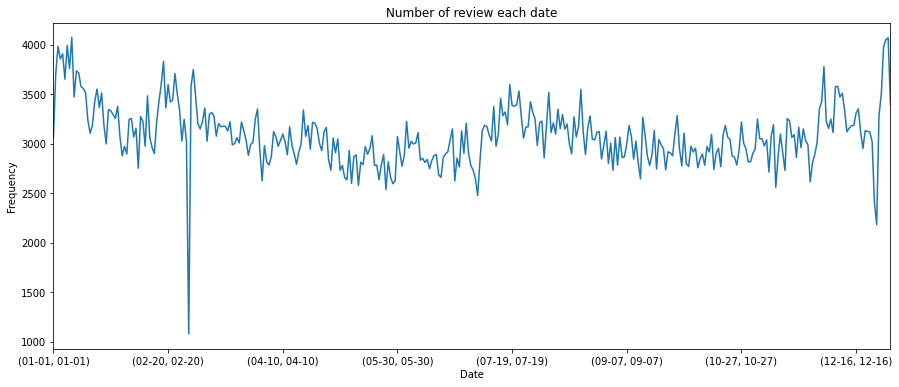

In [0]:
date = df4.groupby('Date').Date.value_counts().plot(kind='line',figsize=(15,6),title="Number of review each date")
date.set_xlabel("Date")
date.set_ylabel("Frequency")

In [0]:
df4.groupby('Year').Year.value_counts().sort_values(ascending = False)

Year  Year
2015  2015    323296
2016  2016    311797
2014  2014    185045
2017  2017    133312
2013  2013     86864
2018  2018     42005
2012  2012     28228
2011  2011      9147
2010  2010      3459
2009  2009      2405
2008  2008      1691
2007  2007       679
2006  2006       318
2005  2005       132
2004  2004        41
2003  2003        16
2002  2002         2
Name: Year, dtype: int64

Text(0, 0.5, 'Frequency')

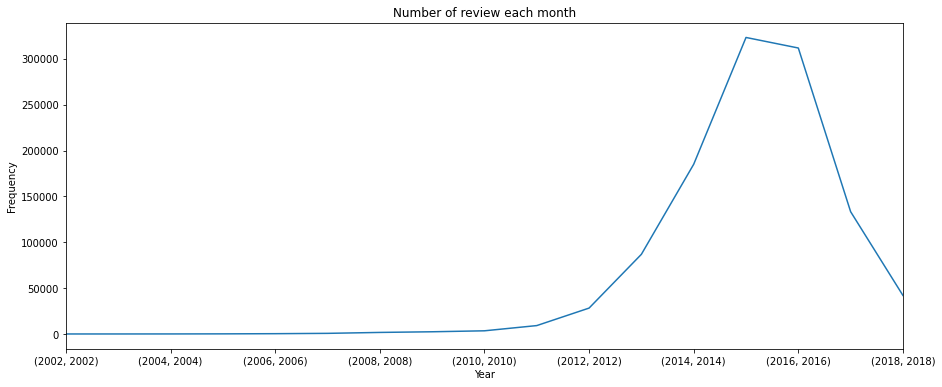

In [0]:
year = df4.groupby('Year').Year.value_counts().plot(kind='line',figsize=(15,6),title="Number of review each month")
year.set_xlabel("Year")
year.set_ylabel("Frequency")

In [0]:
df4.groupby('Month').Month.value_counts().sort_values(ascending = False)

Month  Month
1      1        107697
12     12       102044
3      3         98662
7      7         97909
8      8         96824
2      2         92038
10     10        90546
4      4         90188
11     11        89816
9      9         88464
6      6         87246
5      5         87003
Name: Month, dtype: int64

Text(0, 0.5, 'Frequency')

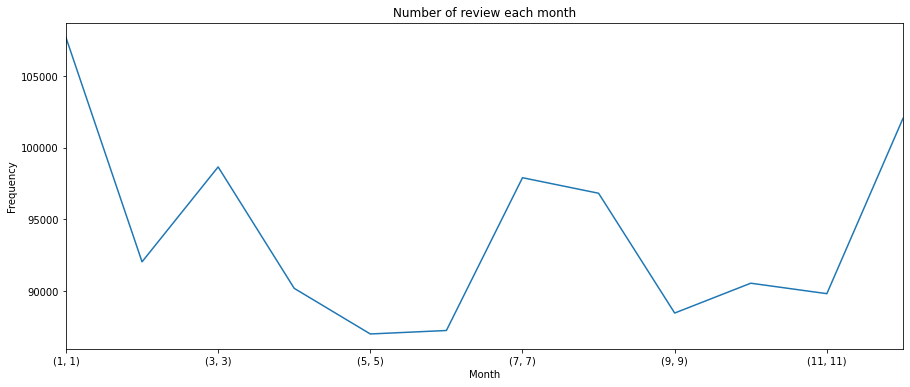

In [0]:
month = df4.groupby('Month').Month.value_counts().plot(kind='line',figsize=(15,6),title="Number of review each month")
month.set_xlabel("Month")
month.set_ylabel("Frequency")

In [0]:
df4.groupby('Day').Day.value_counts().sort_values(ascending = False)

Day  Day
9    9      38094
18   18     37830
19   19     37820
2    2      37751
21   21     37684
7    7      37683
23   23     37587
3    3      37545
8    8      37531
22   22     37499
11   11     37419
16   16     37214
28   28     37170
6    6      37145
4    4      37134
20   20     37089
10   10     37070
14   14     37067
17   17     37002
27   27     36923
5    5      36817
15   15     36764
12   12     36409
29   29     36358
13   13     36141
26   26     35848
1    1      35584
24   24     35488
25   25     35419
30   30     34200
31   31     21152
Name: Day, dtype: int64

Text(0, 0.5, 'Frequency')

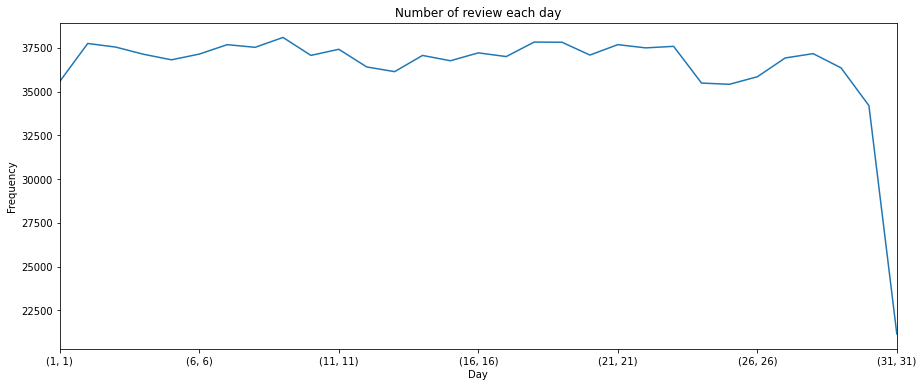

In [0]:
day = df4.groupby('Day').Day.value_counts().plot(kind='line',figsize=(15,6),title="Number of review each day")
day.set_xlabel("Day")
day.set_ylabel("Frequency")

In [0]:
df4.groupby('Weekday').Weekday.value_counts().sort_values(ascending = False)

Weekday    Weekday  
Monday     Monday       181706
Tuesday    Tuesday      177487
Wednesday  Wednesday    173222
Thursday   Thursday     166911
Friday     Friday       155132
Sunday     Sunday       138577
Saturday   Saturday     135402
Name: Weekday, dtype: int64

Text(0, 0.5, 'Frequency')

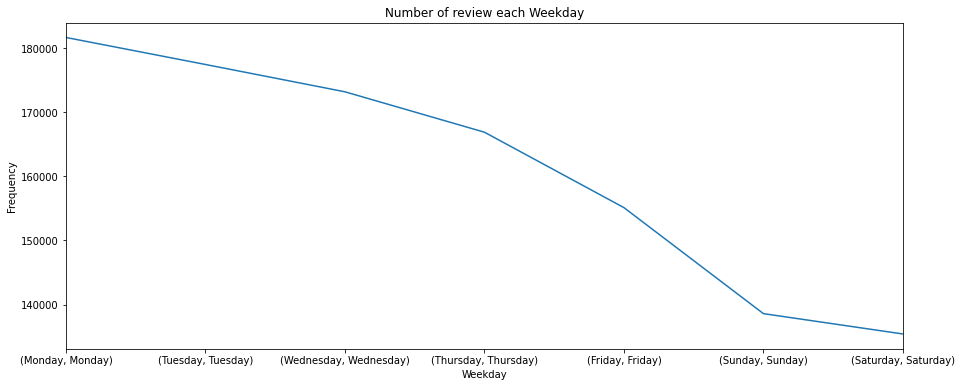

In [0]:
week = df4.groupby('Weekday').Weekday.value_counts().sort_values(ascending = False).plot(kind='line',figsize=(15,6),title="Number of review each Weekday")
week.set_xlabel("Weekday")
week.set_ylabel("Frequency")